In [1]:
observations = ""
y_true = ""
number_classes = 4

In [2]:
# Parameters
observations = "data/final/experiements/Binary Classification Experiment/observation.pkl"
y_true = "data/final/experiements/Binary Classification Experiment/y_true.pkl"
number_classes = 15


In [3]:
import joblib
observations = joblib.load(observations)
y_true =joblib.load(y_true)

In [4]:
num_clients = None
for observation_name in observations.keys():
    observation = observations[observation_name]
    if num_clients:
        assert len(observation) == num_clients
    else:
        num_clients = len(observation)

# Binary Classification per Client

In [5]:
import pandas as pd
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report, confusion_matrix

In [6]:
splits_labels_distributions = {}
split_predictions = {}
for split_name in observations.keys():
    split_observation = observations[split_name]
    clients_counts = []
    predictions = []
    for client_obeservation in split_observation:
        counts = np.zeros(number_classes)
        for label, count in zip(client_obeservation[0], client_obeservation[1]):
            counts[int(label)] = count
            del label, count
        clients_counts.append(counts)
        predictions.append(client_obeservation[2])
        del client_obeservation
    
    splits_labels_distributions[split_name] = pd.DataFrame(clients_counts, columns=list(range(number_classes))).astype(int)
    split_predictions[split_name] = predictions
    del predictions, split_name, split_observation, clients_counts

In [7]:
assert observations.keys() == splits_labels_distributions.keys() == split_predictions.keys()

--------------------------------------------------Straitified Split--------------------------------------------------
--------------------------------------------------Straitified Split (Client 0)--------------------------------------------------
              precision    recall  f1-score   support

       False       1.00      1.00      1.00    227132
        True       1.00      1.00      1.00     55656

    accuracy                           1.00    282788
   macro avg       1.00      1.00      1.00    282788
weighted avg       1.00      1.00      1.00    282788

--------------------------------------------------Straitified Split (Client 1)--------------------------------------------------
              precision    recall  f1-score   support

       False       1.00      1.00      1.00    227132
        True       1.00      1.00      1.00     55656

    accuracy                           1.00    282788
   macro avg       1.00      1.00      1.00    282788
weighted avg       1.00  

,client 1,client 2,client 3
Straitified Split,0.999148,0.998996,0.775135
Random Split (== size),0.999183,0.999123,0.807333
Random Split (!= size),0.999088,0.998978,0.791413


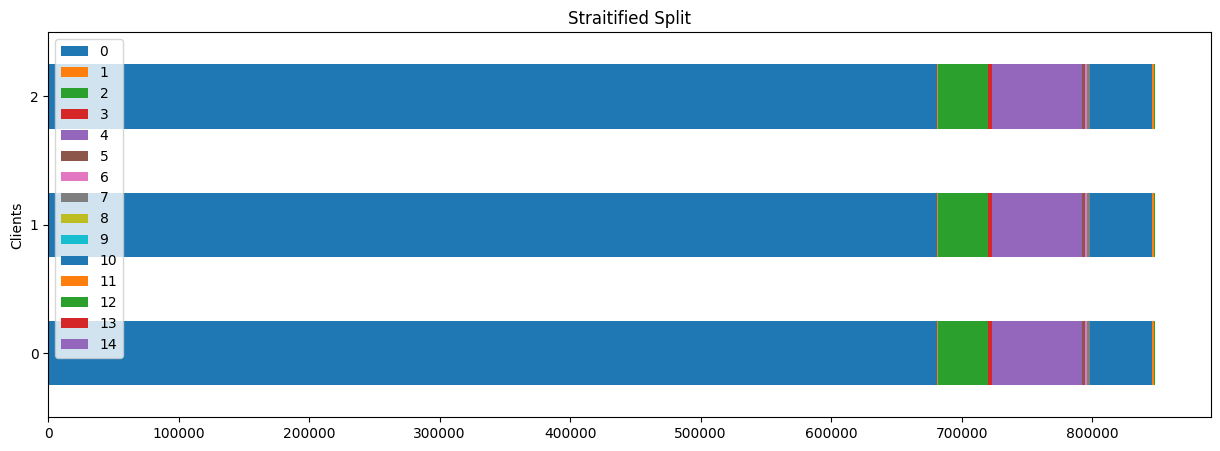

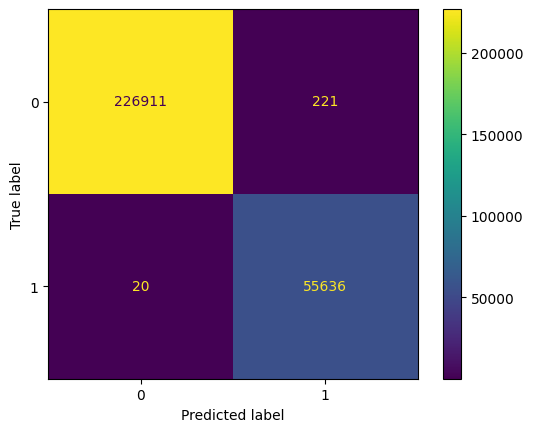

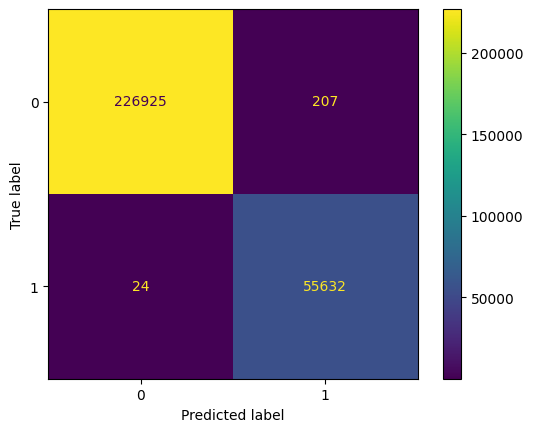

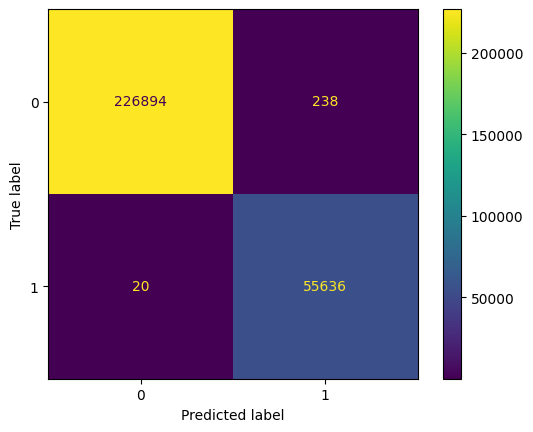

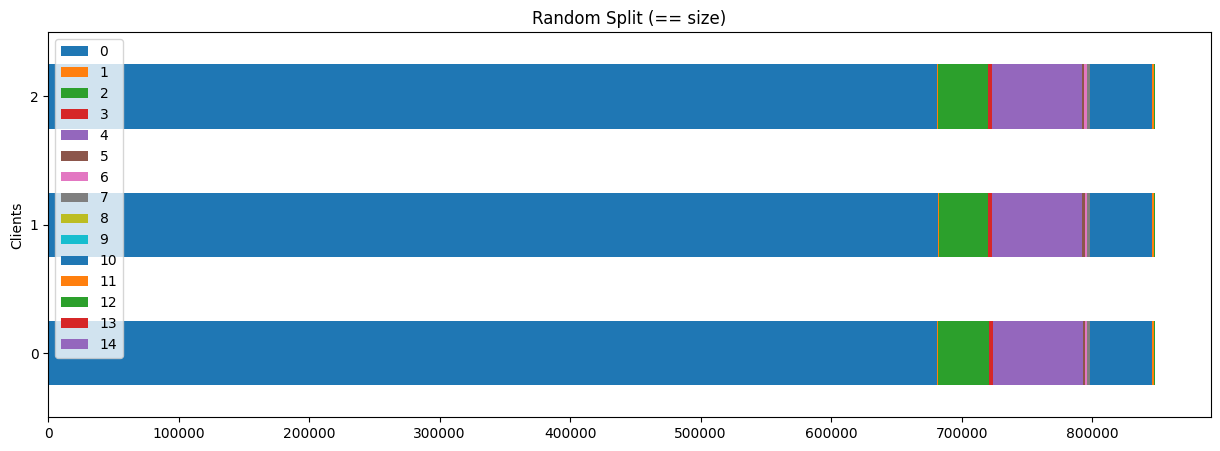

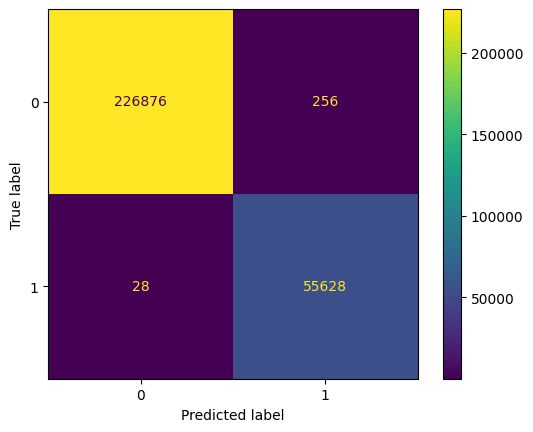

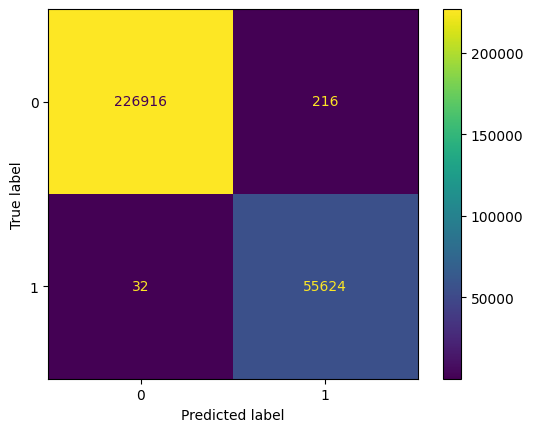

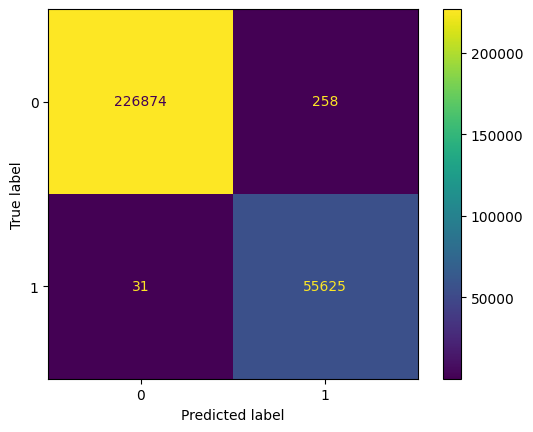

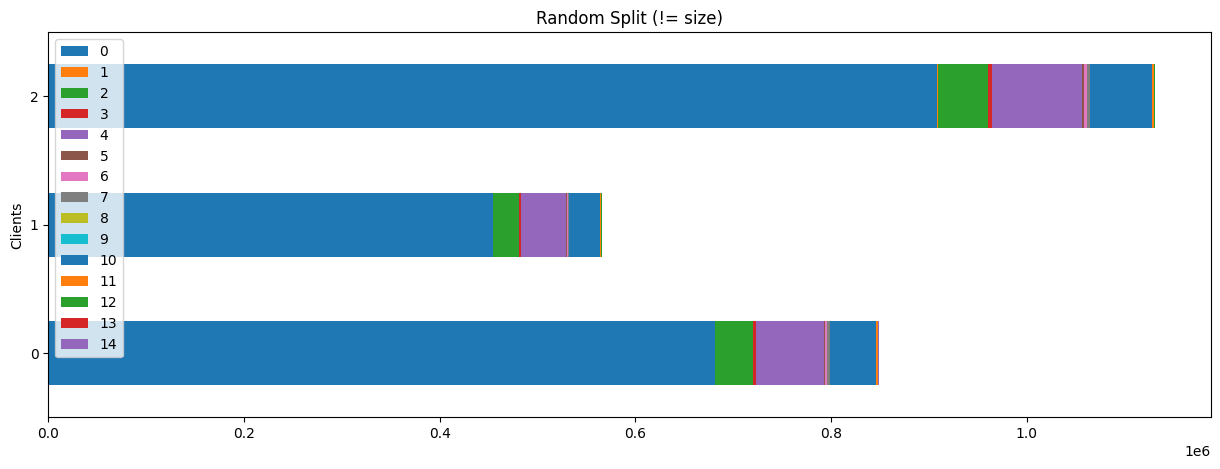

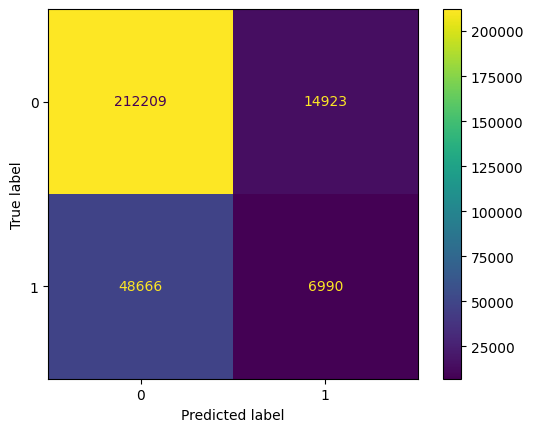

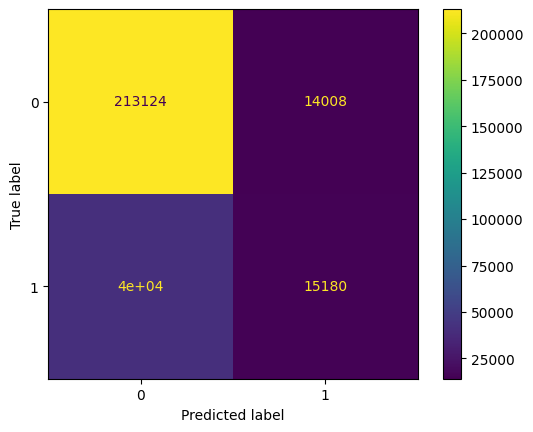

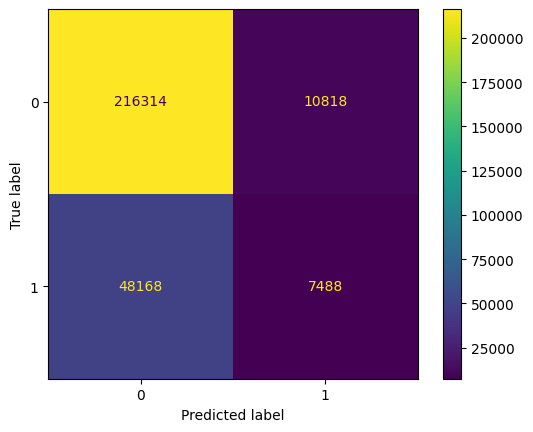

In [8]:
acc_scores = {}

client_names = [f'client {i + 1}' for i in range(num_clients)]

for split_name in observations.keys():
    ax = splits_labels_distributions[split_name].plot.barh(title=split_name, ylabel='Clients', figsize=(15, 5), stacked=True)
    acc_scores[split_name] = [accuracy_score(y_true, y_pred) for y_pred in split_predictions[split_name]]
    print(f"--------------------------------------------------{split_name}--------------------------------------------------")
    for index, y_pred in enumerate(split_predictions[split_name]):
        print(f"--------------------------------------------------{split_name} (Client {index})--------------------------------------------------")
        disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_true, y_pred))
        disp.plot()
        print(classification_report(y_true, y_pred))

acc_scores_df = pd.DataFrame(acc_scores, index=observations.keys())
acc_scores_df.columns = client_names
acc_scores_df